In [1]:
import numpy as np
import matplotlib.pyplot as plt
from discretize.utils import ndgrid
import geoana

In [2]:
length = 0.2
e_dipole = geoana.em.static.LineCurrentFreeSpace(
    nodes = np.array([
        [-length/2, 0, -1],
        [length/2, 0, -1]
    ]),
    current = 1/length
)
e_dipole_center = e_dipole.nodes.mean(0)

In [3]:
e_dipole_harmonic = geoana.em.fdem.ElectricDipoleWholeSpace(
    frequency=0,
    location=e_dipole_center,
    orientation="x"
)

In [4]:
# z = i mu omega
# y = sigma + i epsilon omega
# k^2 = mu * epsilon * omega^2 - i mu sigma omega
k = 0 

In [5]:
rx_locs = ndgrid([
    np.r_[0],
    np.linspace(-10, 10, 50),
    np.r_[10]
])

In [7]:
r_vec = rx_locs - e_dipole_center
r = np.sqrt((r_vec**2).sum(1))
Hy = 1 / (4*np.pi*r**3) * -r_vec[:, 2] 
Hz = 1 / (4*np.pi*r**3) * r_vec[:, 1] 

In [8]:
geoana_soln = e_dipole.magnetic_field(rx_locs)
geoana_harmonic = e_dipole_harmonic.magnetic_field(rx_locs)

/Users/lindseyjh/opt/miniconda3/envs/uxo/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/lindseyjh/opt/miniconda3/envs/uxo/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


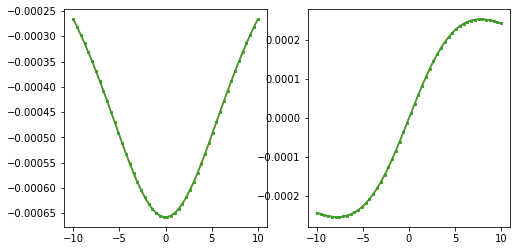

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(rx_locs[:, 1], Hy)
ax[0].plot(rx_locs[:, 1], geoana_soln[:, 1], "-o", ms=2, alpha=0.8)
ax[0].plot(rx_locs[:, 1], geoana_harmonic[:, 1], "-s", ms=2, alpha=0.8)

ax[1].plot(rx_locs[:, 1], Hz)
ax[1].plot(rx_locs[:, 1], geoana_soln[:, 2], "-o", ms=2, alpha=0.8)
ax[1].plot(rx_locs[:, 1], geoana_harmonic[:, 2], "-s", ms=2, alpha=0.8)


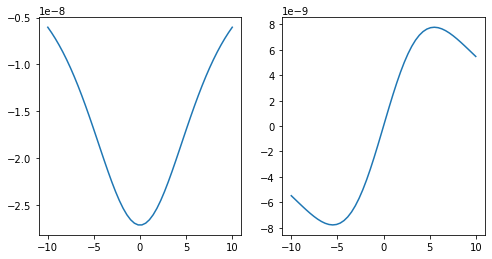

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(rx_locs[:, 1], Hy-geoana_soln[:, 1])
ax[1].plot(rx_locs[:, 1], Hz-geoana_soln[:, 2])